# Plot results files #

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size' : 22})

In [3]:
#WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\ATA001_Atlantic\03_CFD\05_PostProcess\1A_Wet2Dry\Fine_mesh\Thermal\PDF-MHLF-125'
#scenario='1A'
WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\ATA001_Atlantic\03_CFD\05_PostProcess\3A_Dry2Wet\Fine-mesh\Thermal\MHLF-125'
scenario='3A'
#WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\ATA001_Atlantic\03_CFD\05_PostProcess\1B_Wet2Dry'
#scenario='1B'
#### Wind velocity
vel='8.9ms'
#vel='3.61ms'
#### Tip type
tip='dry'  
#tip='wet'
file_oxygen=r'oxygen-point-'+ tip + '-'+ vel + '-rfile.out'
file_temp=r'temp-point-' + tip + '-'+ vel +'-rfile.out'
#file_oxygen=r'oxygen-point-'+ tip + '-'+ vel + '.out'
#file_temp=r'temp-point-' + tip + '-'+ vel +'.out'
case_ox=os.path.join(WorkingDir,file_oxygen)
case_temp=os.path.join(WorkingDir,file_temp)


For inverted data

In [4]:
#data_ox_t= pd.read_csv(case_ox, sep=' ', skiprows=3, names=['iter','6m','4m','2m','0m'])
#data_ox = data_ox_t[['iter','0m','2m','4m','6m']]

In [5]:
#data_temp_t= pd.read_csv(case_temp, sep=' ', skiprows=3, names=['iter','6m','4m','2m','0m'])
#data_temp=data_temp_t[['iter','0m','2m','4m','6m']]

For straight data

In [6]:
data_ox= pd.read_csv(case_ox, sep=' ', skiprows=3, names=['iter','0m','2m','4m','6m'])

In [7]:
data_ox['velseal']=(data_ox['2m']+data_ox['4m'])/2

In [8]:
data_temp= pd.read_csv(case_temp, sep=' ', skiprows=3, names=['iter','0m','2m','4m','6m'])

In [9]:
data_temp['velseal']=(data_temp['2m']+data_temp['4m'])/2

In [10]:
data_ox.dtypes

iter         int64
0m         float64
2m         float64
4m         float64
6m         float64
velseal    float64
dtype: object

In [11]:
dt_ox=data_ox.select_dtypes(exclude=['int64'])*100

In [12]:
dt_temp=data_temp.select_dtypes(exclude=['int64'])

In [13]:
dt_ox=dt_ox.iloc[200:,:]

In [14]:
dt_temp=dt_temp.iloc[200:,:]

In [15]:
dt_temp=dt_temp-273.15

In [16]:
dt_temp

,0m,2m,4m,6m,velseal
200,757.728911,53.169904,52.985250,52.963007,53.077577
201,759.110985,53.157327,52.980332,52.956566,53.068830
202,763.041671,53.147042,52.975839,52.949658,53.061441
203,772.766709,53.138882,52.971891,52.943539,53.055386
204,783.654310,53.132513,52.968486,52.938258,53.050500
...,...,...,...,...,...
996,1133.026062,52.907641,52.800762,52.787158,52.854202
997,1126.801964,52.908294,52.800685,52.787125,52.854490
998,1117.201760,52.910359,52.800606,52.787077,52.855482
999,1107.575219,52.909547,52.800541,52.787022,52.855044


In [17]:
plt.ioff()

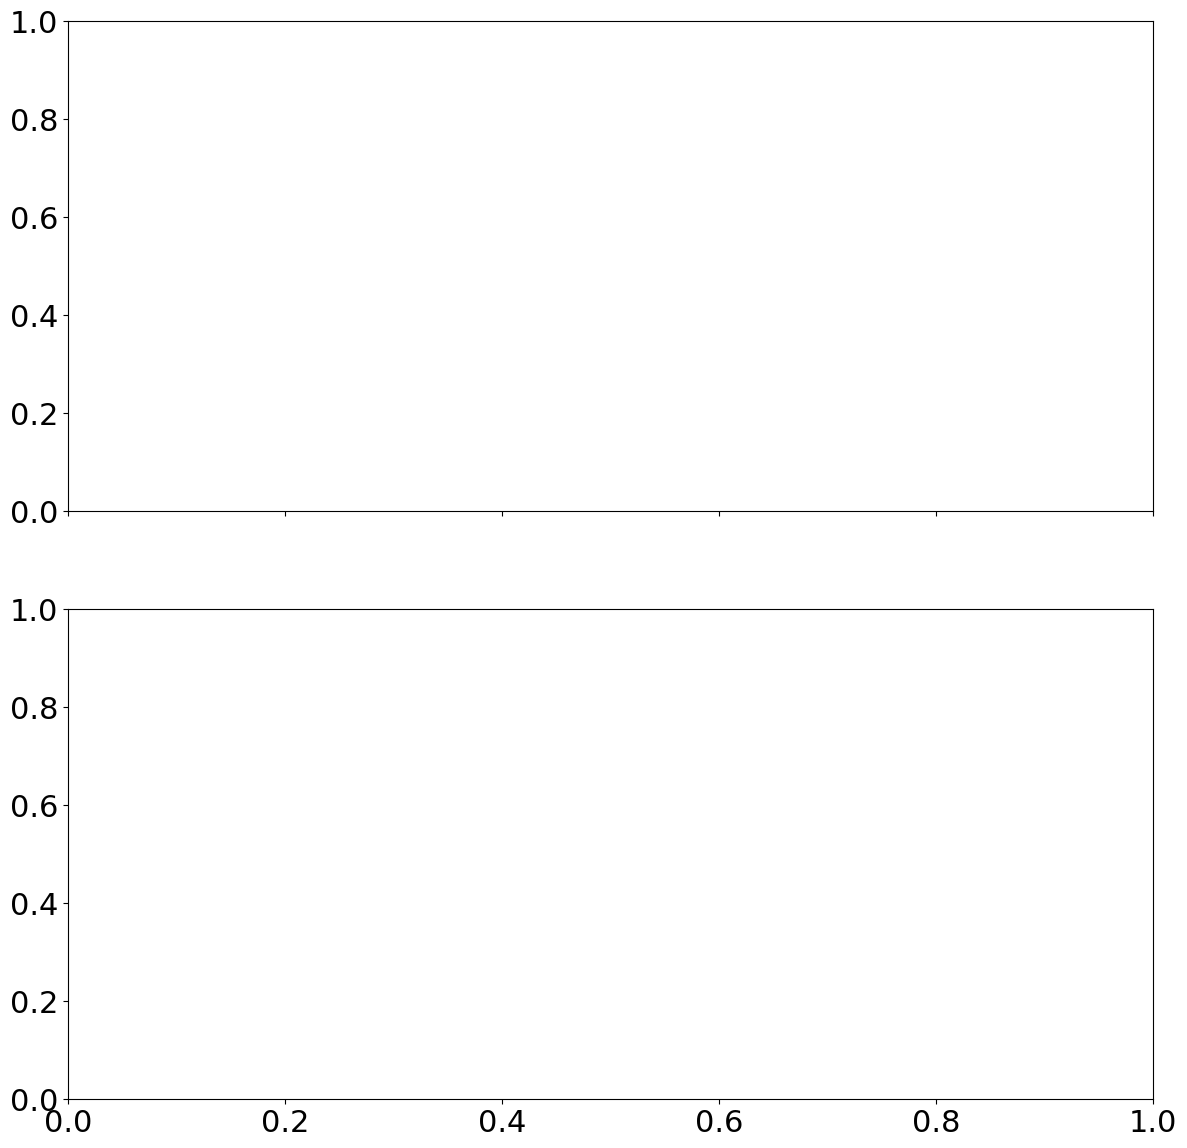

In [18]:
fig, axs = plt.subplots(2,1, figsize=(14,14),sharex=True)

In [19]:
plt.ioff()

In [20]:
fig, axs = plt.subplots(2,1, figsize=(14,14),sharex=True)

In [21]:
fig.suptitle('Scenario-'+scenario +' '+ tip +' Tip-'+ vel,fontsize='x-large')

Text(0.5, 0.98, 'Scenario-3A dry Tip-8.9ms')

In [22]:
#axs[0].plot(dt_ox, label=['0m','2m')

In [23]:
axs[0].plot(dt_ox, label=['0m','2m','4m','6m','Flange'], linewidth=3)
#axs[0].plot(dt_ox, label=['0m','2m','4m','6m'], linewidth=3)

In [24]:
axs[0].set_title('Oxygen Concentration')

Text(0.5, 1.0, 'Oxygen Concentration')

In [25]:
axs[0].set_ylabel(r'$O_2$ [%]')

Text(0, 0.5, '$O_2$ [%]')

In [26]:
axs[0].legend(loc='upper left')

In [27]:
axs[1].plot(dt_temp,label=['0m','2m','4m','6m','Flange'],linewidth=3)
#axs[1].plot(dt_temp,label=['0m','2m','4m','6m'],linewidth=3)

In [28]:
axs[1].set_title('Temperature')

Text(0.5, 1.0, 'Temperature')

In [29]:
axs[1].set_ylabel(r'T$\quad [^oC] $')

Text(0, 0.5, 'T$\\quad [^oC] $')

In [30]:
axs[1].set_xlabel('Iterations')

Text(0.5, 0, 'Iterations')

In [31]:
axs[1].legend(loc='upper left')

In [32]:
figureName='figure-'+scenario+'-'+tip+'-'+vel+'.png'

In [33]:
figurePath=os.path.join(WorkingDir,figureName)

In [34]:
print(figurePath)

C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\ATA001_Atlantic\03_CFD\05_PostProcess\3A_Dry2Wet\Fine-mesh\Thermal\MHLF-125\figure-3A-dry-8.9ms.png


In [35]:
plt.savefig(figurePath)

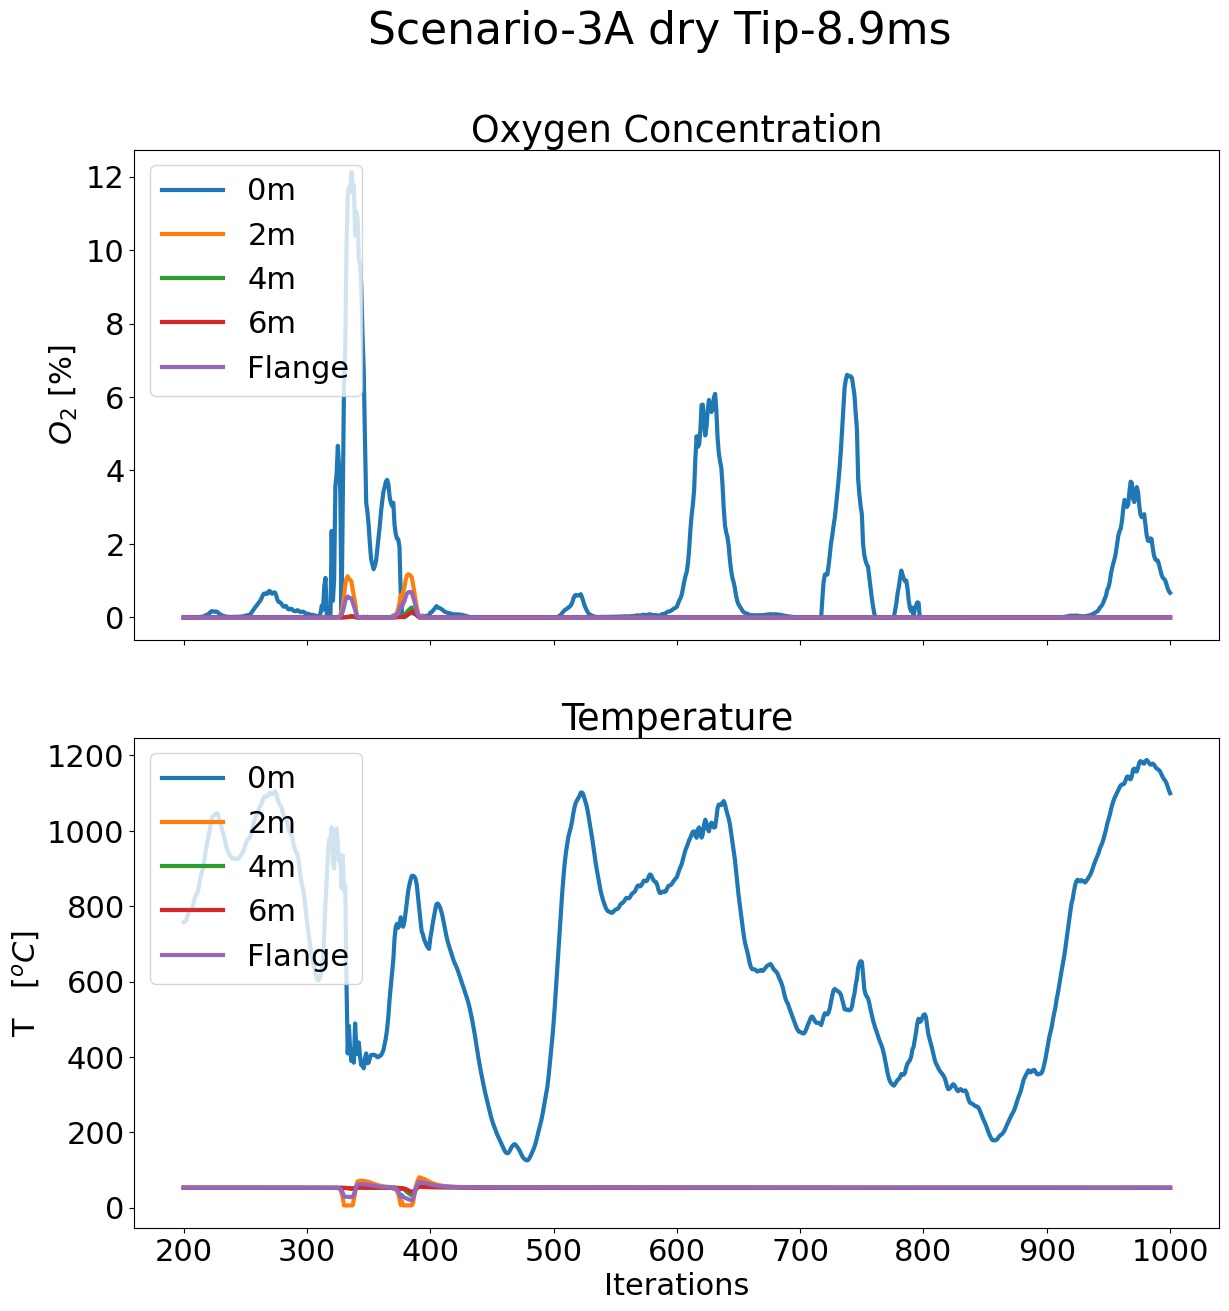

In [36]:
plt.show()